Install and load the required packages.

In [ ]:
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("lubridate")
install.packages("readr")
install.packages("janitor")
install.packages("styler")
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)
library(readr)
library(janitor)
library(styler)

Creating data frames for all the csv files:

In [ ]:
# Creating a list of csv files in the directory
files_csv <- list.files(path = "bellabeat_data/", pattern = "*.csv")

#Creating a list of file names for the data frames
files <- substr(files_csv,1,nchar(files_csv)-4)

# Creating data frames for all the csv files:
for(i in files){
  filepath = file.path(paste("bellabeat_data/",i,".csv", sep = ""))
  assign(i,read_csv(filepath))
}

Count the distinct IDs in each data frame to determine how many individuals there were for each data set.

In [42]:
n_distinct(dailyActivity_merged$Id)
n_distinct(dailyCalories_merged$Id)
n_distinct(dailyIntensities_merged$Id)
n_distinct(dailySteps_merged$Id)
n_distinct(heartrate_seconds_merged$Id)
n_distinct(hourlyCalories_merged$Id)
n_distinct(hourlyIntensities_merged$Id)
n_distinct(hourlySteps_merged$Id)
n_distinct(minuteCaloriesNarrow_merged$Id)
n_distinct(minuteCaloriesWide_merged$Id)
n_distinct(minuteIntensitiesNarrow_merged$Id)
n_distinct(minuteIntensitiesWide_merged$Id)
n_distinct(minuteMETsNarrow_merged$Id)
n_distinct(minuteSleep_merged$Id)
n_distinct(minuteStepsNarrow_merged$Id)
n_distinct(minuteStepsWide_merged$Id)
n_distinct(sleepDay_merged$Id)
n_distinct(weightLogInfo_merged$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 14

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 33

[1] 33

[1] 24

[1] 8

All data sets had 33 individuals, except for:
- heartrate_seconds = 14
- minuteSleep = 24
- sleepDay = 24
- WeightLogInfo = 8

## Processing the Daily Activity Data

### Processing the Daily Activity Data:

Determine how the data is structured.The structure of the data:

In [43]:
str(dailyActivity_merged)

spc_tbl_ [940 x 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

Check for NA values and duplicate rows.

In [44]:
sum(is.na(dailyActivity_merged))
sum(duplicated(dailyActivity_merged))

[1] 0

[1] 0

Clean the column names.

In [45]:
dailyActivity_merged <- clean_names(dailyActivity_merged)
glimpse(dailyActivity_merged)

Rows: 940
Columns: 15
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960~
$ activity_date              <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/1~
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130~
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9~
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9~
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3~
$ moderately_active_distance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1~
$ light_active_distance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5~
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0~
$ very_active_minutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66,~
$ fairly_active_minutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, ~
$ lightly_active_m

Add a new date column in appropriate format, column for day of the week (with Monday being designated as the first day) and an "id_and_date" to use as reference for joins later.

In [46]:
dailyActivity_merged <- dailyActivity_merged %>%
  mutate(
    new_date = as.Date(activity_date,"%m/%d/%y"),
    week_day = wday(new_date,label=TRUE,week_start=1),
    id_and_date = paste0(id,"_and_",new_date)
  )
str(dailyActivity_merged)

tibble [940 x 18] (S3: tbl_df/tbl/data.frame)
 $ id                        : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_date             : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ total_steps               : num [1:940] 13162 10735 10460 9762 12669 ...
 $ total_distance            : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ tracker_distance          : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ logged_activities_distance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : num [1:940] 328 217 1

## Processing the Daily Sleep Data

Determine how the data is structured.

In [47]:
str(sleepDay_merged)

spc_tbl_ [413 x 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Check for NA values and duplicate rows.

In [48]:
sum(is.na(sleepDay_merged))
sum(duplicated(sleepDay_merged))

[1] 0

[1] 3

Remove duplicates.

In [49]:
sleepDay_merged <- sleepDay_merged[!duplicated(sleepDay_merged),]
sum(duplicated(sleepDay_merged))

[1] 0

Clean the column names.

In [50]:
sleepDay_merged <- clean_names(sleepDay_merged)
str(sleepDay_merged)

tibble [410 x 5] (S3: tbl_df/tbl/data.frame)
 $ id                  : num [1:410] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ sleep_day           : chr [1:410] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ total_sleep_records : num [1:410] 1 2 1 2 1 1 1 1 1 1 ...
 $ total_minutes_asleep: num [1:410] 327 384 412 340 700 304 360 325 361 430 ...
 $ total_time_in_bed   : num [1:410] 346 407 442 367 712 320 377 364 384 449 ...


Add a new column for time awake in bed, a new date column in appropriate format, column for day of the week (with Monday being designated as the first day) and an "id_and_date" to use as reference for joins later.

In [51]:
sleepDay_merged <- sleepDay_merged %>%
  mutate(
    time_awake_in_bed = total_time_in_bed - total_minutes_asleep,
    new_date = as.Date(sleep_day,"%m/%d/%y"),
    week_day = wday(new_date,label=TRUE,week_start=1),
    id_and_date = paste0(id,"_and_",new_date)
  )
str(sleepDay_merged)

tibble [410 x 9] (S3: tbl_df/tbl/data.frame)
 $ id                  : num [1:410] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ sleep_day           : chr [1:410] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ total_sleep_records : num [1:410] 1 2 1 2 1 1 1 1 1 1 ...
 $ total_minutes_asleep: num [1:410] 327 384 412 340 700 304 360 325 361 430 ...
 $ total_time_in_bed   : num [1:410] 346 407 442 367 712 320 377 364 384 449 ...
 $ time_awake_in_bed   : num [1:410] 19 23 30 27 12 16 17 39 23 19 ...
 $ new_date            : Date[1:410], format: "2020-04-12" "2020-04-13" ...
 $ week_day            : Ord.factor w/ 7 levels "Mon"<"Tue"<"Wed"<..: 7 1 3 4 5 7 1 2 4 5 ...
 $ id_and_date         : chr [1:410] "1503960366_and_2020-04-12" "1503960366_and_2020-04-13" "1503960366_and_2020-04-15" "1503960366_and_2020-04-16" ...


## Processing the Daily Weight Data

Determine how the data is structured.

In [52]:
str(weightLogInfo_merged)

spc_tbl_ [67 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id            : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr [1:67] "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num [1:67] 116 116 294 125 126 ...
 $ Fat           : num [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: logi [1:67] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ LogId         : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   Date = col_character(),
  ..   WeightKg = col_double(),
  ..   WeightPounds = col_double(),
  ..   Fat = col_double(),
  ..   BMI = col_double(),
  ..   IsManualReport = col_logical(),
  ..   LogId = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Check for NA values and duplicate rows.

In [53]:
sum(is.na(weightLogInfo_merged))
sum(duplicated(weightLogInfo_merged))

[1] 65

[1] 0

NA values exist - double check what they actually are.

In [54]:
head(weightLogInfo_merged)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


They are just 'Fat' records that weren't put in, but other daily data exists for these dates and, if we need, we can filter out these NA vales if we analyse Fat data.

Clean the column names.

In [55]:
weightLogInfo_merged <- clean_names(weightLogInfo_merged)
str(weightLogInfo_merged)

spc_tbl_ [67 x 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id              : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ date            : chr [1:67] "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ weight_kg       : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
 $ weight_pounds   : num [1:67] 116 116 294 125 126 ...
 $ fat             : num [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
 $ bmi             : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
 $ is_manual_report: logi [1:67] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ log_id          : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   Date = col_character(),
  ..   WeightKg = col_double(),
  ..   WeightPounds = col_double(),
  ..   Fat = col_double(),
  ..   BMI = col_double(),
  ..   IsManualReport = col_logical(),
  ..   LogId = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Add a new date column in appropriate format, column for day of the week and an "id_and_date" to use as reference for joins later.

In [56]:
weightLogInfo_merged <- weightLogInfo_merged %>%
  mutate(
    new_date = as.Date(date,"%m/%d/%y"),
    week_day = wday(new_date,label=TRUE,week_start=1),
    id_and_date = paste0(id,"_and_",new_date)
  )
str(weightLogInfo_merged)

tibble [67 x 11] (S3: tbl_df/tbl/data.frame)
 $ id              : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ date            : chr [1:67] "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ weight_kg       : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
 $ weight_pounds   : num [1:67] 116 116 294 125 126 ...
 $ fat             : num [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
 $ bmi             : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
 $ is_manual_report: logi [1:67] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ log_id          : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
 $ new_date        : Date[1:67], format: "2020-05-02" "2020-05-03" ...
 $ week_day        : Ord.factor w/ 7 levels "Mon"<"Tue"<"Wed"<..: 6 7 1 2 2 5 1 6 6 5 ...
 $ id_and_date     : chr [1:67] "1503960366_and_2020-05-02" "1503960366_and_2020-05-03" "1927972279_and_2020-04-13" "2873212765_and_2020-04-21" ...


## Creating temp tables for joining

Daily Activity Data:

In [57]:
colnames(dailyActivity_merged)

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"                   "new_date"                  
[17] "week_day"                   "id_and_date"

In [58]:
temp_daily_activity <- select(dailyActivity_merged, 
  "id", 
  "new_date",
  "id_and_date",
  "total_steps", 
  "total_distance", 
  "very_active_distance",
  "moderately_active_distance",
  "light_active_distance",
  "sedentary_active_distance",
  "very_active_minutes",
  "fairly_active_minutes",
  "lightly_active_minutes",
  "sedentary_minutes",
  "calories", 
  "week_day"
  )

Daily Sleep Data:

In [59]:
colnames(sleepDay_merged)

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"    "time_awake_in_bed"   
[7] "new_date"             "week_day"             "id_and_date"

In [61]:
temp_daily_sleep <- select(sleepDay_merged, 
  "id_and_date",
  "total_sleep_records",
  "time_awake_in_bed",
  "total_minutes_asleep",
  "total_time_in_bed",
  )

Merge these two data frames with an outer join.

In [62]:
merged_daily_activity_and_sleep <- merge(x = temp_daily_activity, y = temp_daily_sleep, by = "id_and_date", all = TRUE)
str(merged_daily_activity_and_sleep)

'data.frame':	940 obs. of  19 variables:
 $ id_and_date               : chr  "1503960366_and_2020-04-12" "1503960366_and_2020-04-13" "1503960366_and_2020-04-14" "1503960366_and_2020-04-15" ...
 $ id                        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ new_date                  : Date, format: "2020-04-12" "2020-04-13" ...
 $ total_steps               : num  13162 10735 10460 9762 12669 ...
 $ total_distance            : num  8.5 6.97 6.74 6.28 8.16 ...
 $ very_active_distance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : num  25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : num  13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : num  328 217 181 209 221 164 233 264 205 211 ...
 $ sedentary_minutes         : num  728 776 12

Daily Weight Data.

In [26]:
colnames(weightLogInfo_merged)

[1] "id"               "date"             "weight_kg"        "weight_pounds"   
 [5] "fat"              "bmi"              "is_manual_report" "log_id"          
 [9] "new_date"         "week_day"         "id_and_date"

In [63]:
temp_daily_weight <- select(weightLogInfo_merged, 
  "id_and_date",
  "weight_kg",
  "weight_pounds",
  "fat",
  "bmi",
  "is_manual_report",
  )
colnames(temp_daily_weight)

[1] "id_and_date"      "weight_kg"        "weight_pounds"    "fat"             
[5] "bmi"              "is_manual_report"

Merge all data together:

In [64]:
merged_data_daily <- merge(x = merged_daily_activity_and_sleep, y = temp_daily_weight, by = "id_and_date", all = TRUE)
str(merged_data_daily)
glimpse(merged_data_daily)

'data.frame':	940 obs. of  24 variables:
 $ id_and_date               : chr  "1503960366_and_2020-04-12" "1503960366_and_2020-04-13" "1503960366_and_2020-04-14" "1503960366_and_2020-04-15" ...
 $ id                        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ new_date                  : Date, format: "2020-04-12" "2020-04-13" ...
 $ total_steps               : num  13162 10735 10460 9762 12669 ...
 $ total_distance            : num  8.5 6.97 6.74 6.28 8.16 ...
 $ very_active_distance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : num  25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : num  13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : num  328 217 181 209 221 164 233 264 205 211 ...
 $ sedentary_minutes         : num  728 776 12

## Analyzing the Daily Data

Create a data frame of averages to analyse step data and intensity of distances and minutes.

In [29]:
merged_data_daily_averages <- merged_data_daily %>%
  ## remove records where no steps were taken (no device usage)
  filter(total_steps > 0) %>%
  group_by(week_day) %>%
    summarise(
      mean_steps = mean(total_steps),
      mean_total_distance = mean(total_distance),
      mean_very_active_distance = mean(very_active_distance),
      mean_moderately_active_distance = mean(moderately_active_distance),
      mean_light_active_distance = mean(light_active_distance),
      mean_sedentary_active_distance = mean(sedentary_active_distance),
      mean_very_active_minutes = mean(very_active_minutes),
      mean_fairly_active_minutes = mean(fairly_active_minutes),
      mean_lightly_active_minutes = mean(lightly_active_minutes),
      mean_sedentary_minutes = mean(sedentary_minutes),
      mean_calories = mean(calories),
      total_records = sum(!is.na(week_day))
    )
glimpse(merged_data_daily_averages)

Rows: 7
Columns: 13
$ week_day                        <ord> Mon, Tue, Wed, Thu, Fri, Sat, Sun
$ mean_steps                      <dbl> 8157.597, 8185.398, 7820.642, 8946.628~
$ mean_total_distance             <dbl> 5.922662, 5.871429, 5.575417, 6.424602~
$ mean_very_active_distance       <dbl> 1.762734, 1.536842, 1.378583, 1.662035~
$ mean_moderately_active_distance <dbl> 0.5687770, 0.5583459, 0.5080000, 0.743~
$ mean_light_active_distance      <dbl> 3.514029, 3.628722, 3.663583, 3.969292~
$ mean_sedentary_active_distance  <dbl> 0.0014388489, 0.0025563909, 0.00191666~
$ mean_very_active_minutes        <dbl> 22.42446, 21.45113, 21.05833, 23.76106~
$ mean_fairly_active_minutes      <dbl> 14.13669, 13.21805, 12.71667, 16.68142~
$ mean_lightly_active_minutes     <dbl> 204.8777, 204.9398, 214.4083, 227.3097~
$ mean_sedentary_minutes          <dbl> 953.8273, 920.7218, 978.3250, 930.0265~
$ mean_calories                   <dbl> 2339.432, 2274.436, 2351.608, 2428.752~
$ total_records           

Create a graph of total steps for all users per week day.

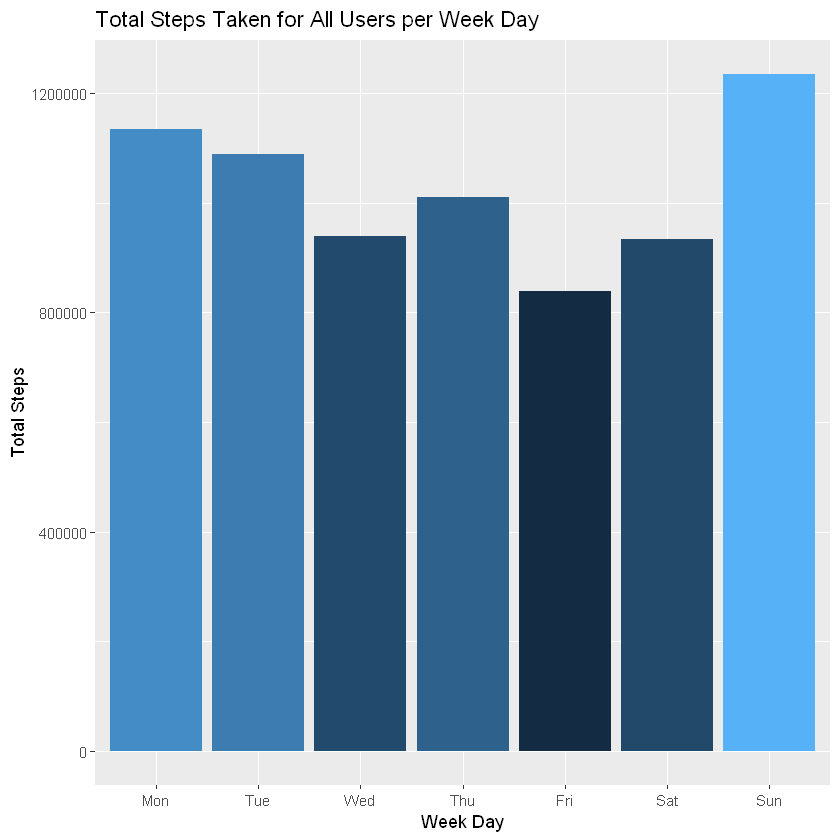

In [66]:
all_steps_daily <- merged_data_daily %>%
  group_by(week_day) %>%
  summarise(
    all_steps = sum(total_steps)
  )
ggplot(data=all_steps_daily,aes(x=week_day,y=all_steps,fill=all_steps)) + geom_col() + geom_col() + labs(title="Total Steps Taken for All Users per Week Day", x="Week Day", y="Total Steps") + guides(fill="none")

Create a graph of average steps per week day:

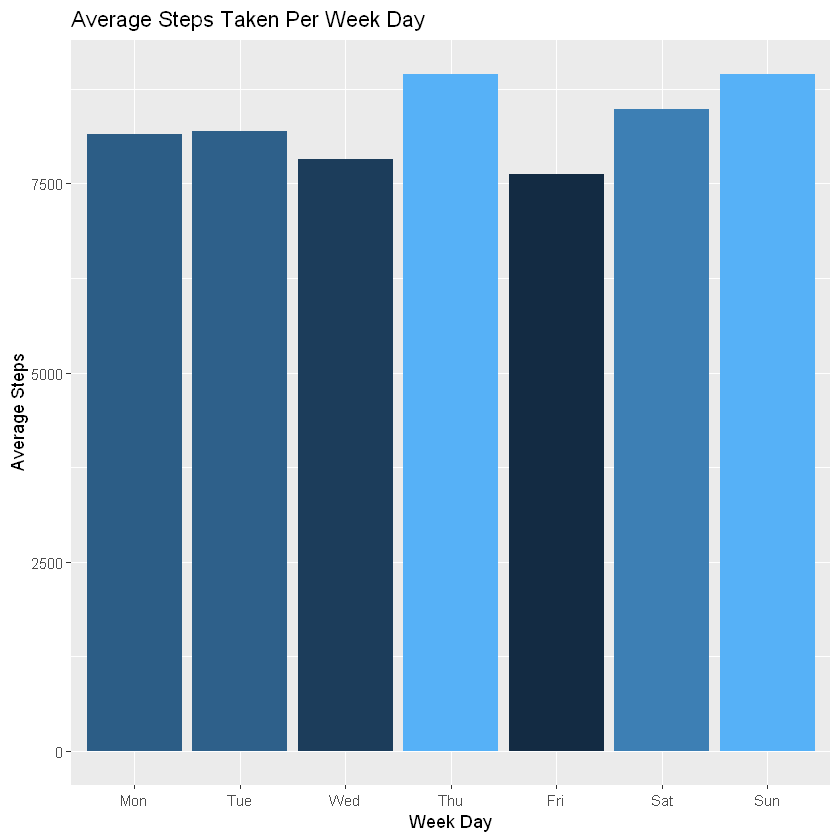

In [67]:
ggplot(data=merged_data_daily_averages, aes(x=week_day,y=mean_steps,fill=mean_steps)) + geom_col() + labs(title="Average Steps Taken Per Week Day", x="Week Day", y="Average Steps") + guides(fill="none")

Create a graph of average calories per week day:

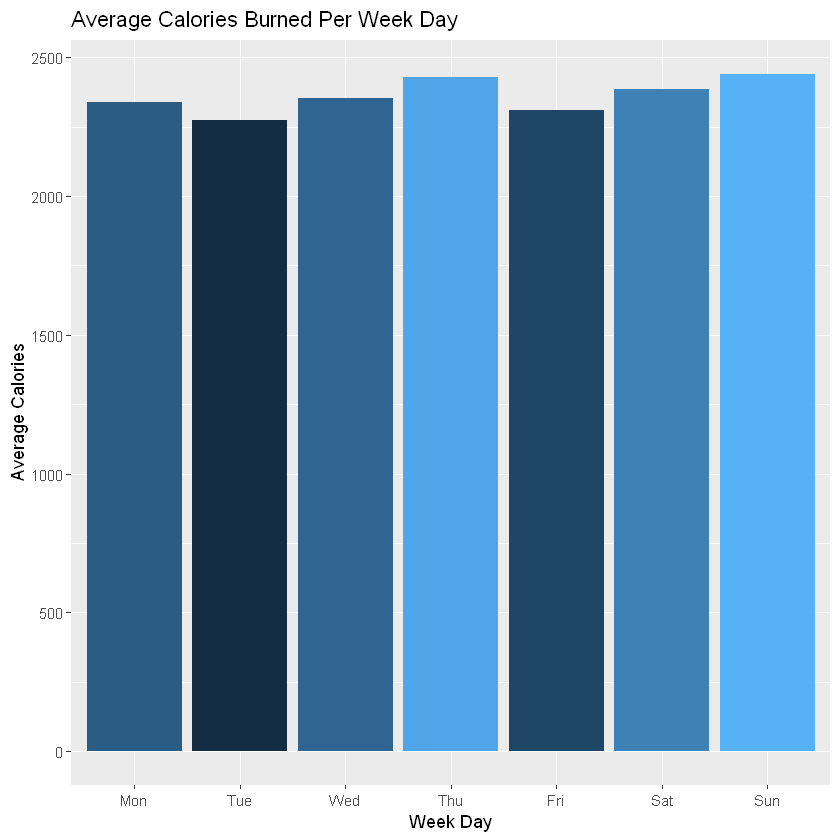

In [68]:
ggplot(data=merged_data_daily_averages, aes(x=week_day,y=mean_calories,fill=mean_calories)) + geom_col() + labs(title="Average Calories Burned Per Week Day", x="Week Day", y="Average Calories") + guides(fill="none")

Create a graph of average records per week day:

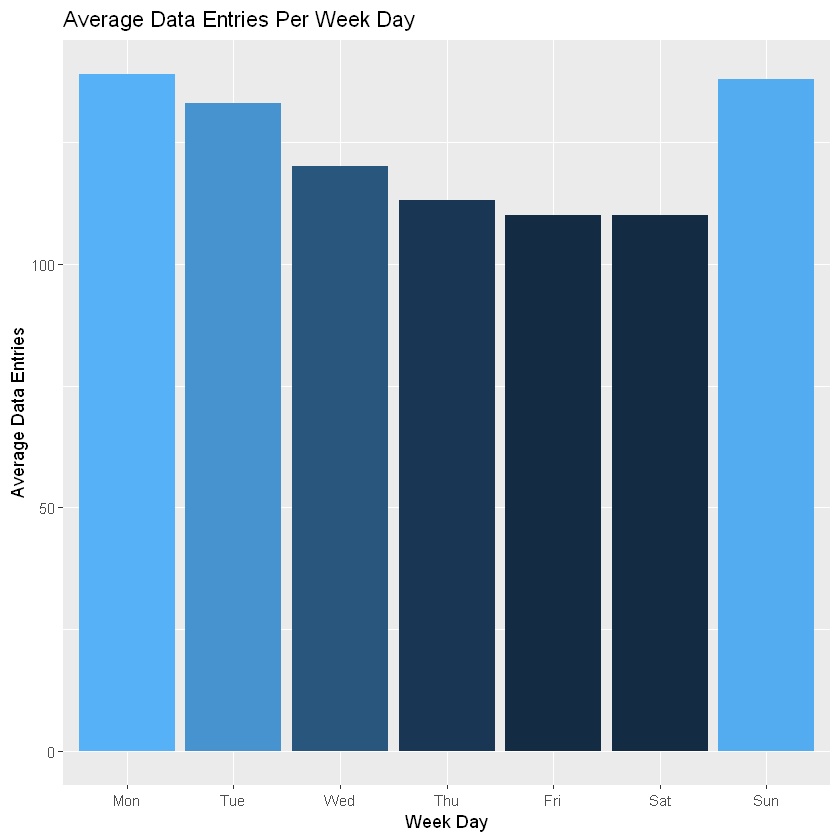

In [69]:
ggplot(data=merged_data_daily_averages, aes(x=week_day,y=total_records,fill=total_records)) + geom_col() + labs(title="Average Data Entries Per Week Day", x="Week Day", y="Average Data Entries") + guides(fill="none")

Create a graph of daily steps vs. daily calories burned.

`geom_smooth()` using formula = 'y ~ x'


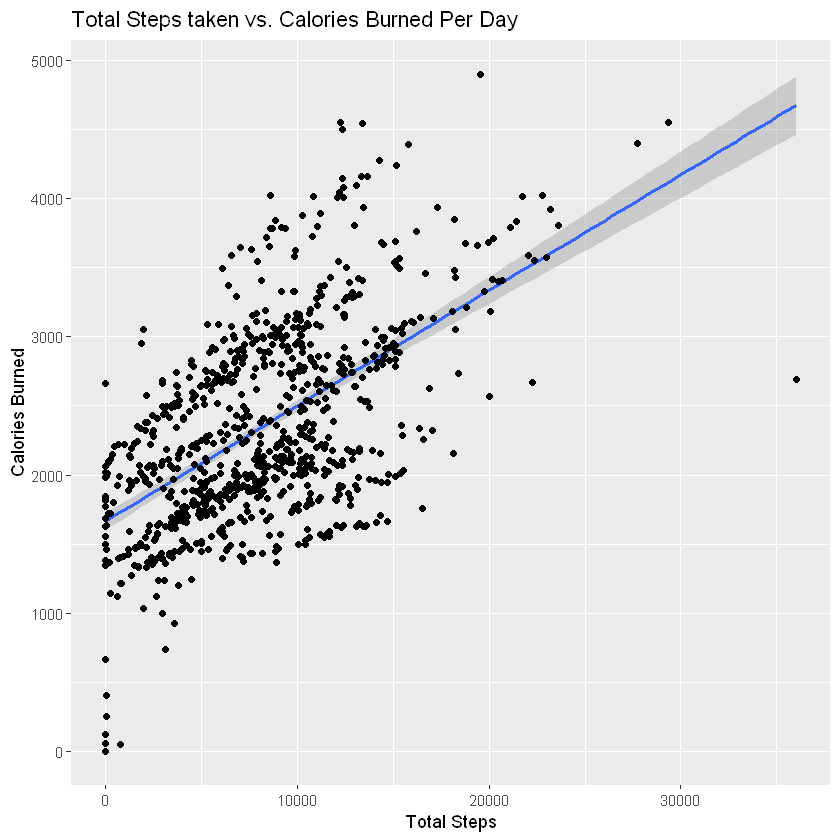

In [70]:
daily_steps_vs_calories <- merged_data_daily %>%
  summarise (
    total_steps = total_steps,
    calories = calories
  )
ggplot(data=daily_steps_vs_calories, aes(x=total_steps,y=calories)) + geom_smooth(method = lm, aes(x=total_steps,y=calories)) + geom_point() + labs(title="Total Steps taken vs. Calories Burned Per Day", x="Total Steps", y="Calories Burned")

Create a graph of very active minutes vs. daily calories burned.

`geom_smooth()` using formula = 'y ~ x'


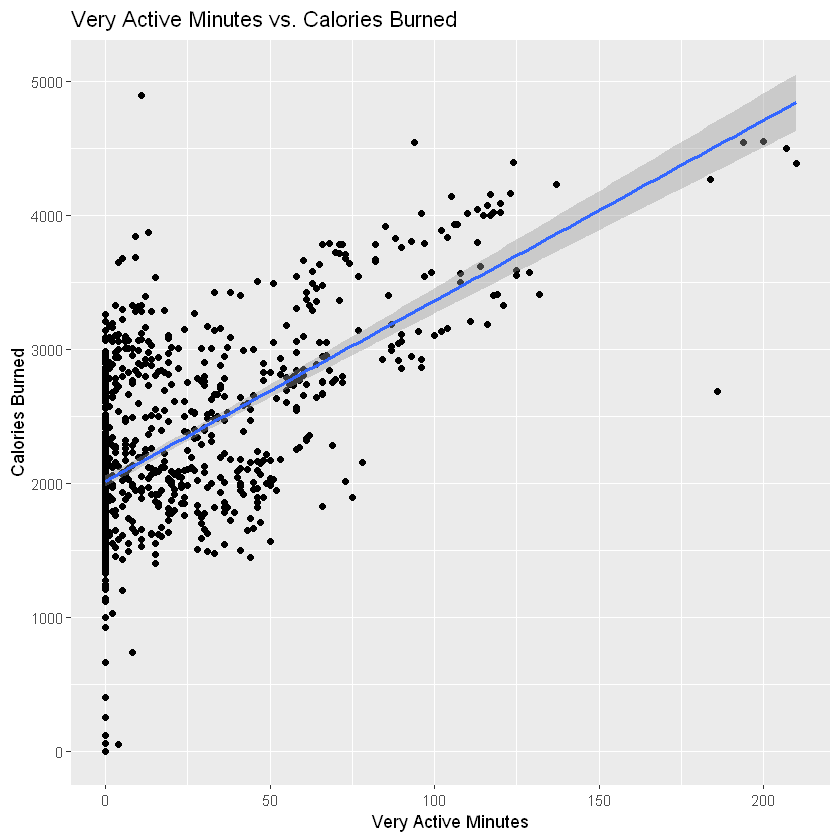

In [71]:
very_active_calories <- merged_data_daily %>%
summarise (
    very_active_minutes = very_active_minutes,
    calories = calories    
    )
ggplot(data=very_active_calories, aes(x=very_active_minutes,y=calories)) + geom_point() + geom_smooth(method=lm, aes(x=very_active_minutes,y=calories)) + labs(title="Very Active Minutes vs. Calories Burned", x="Very Active Minutes",y="Calories Burned")

Create a graph of sedentary minutes vs. daily calories burned.

`geom_smooth()` using formula = 'y ~ x'


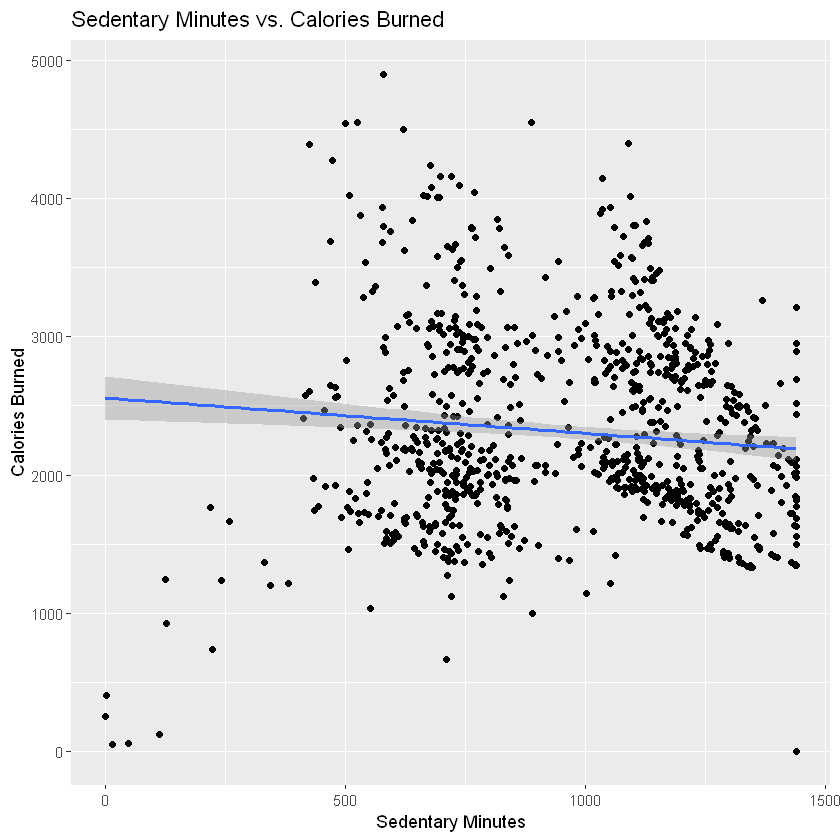

In [72]:
sedentary_calories <- merged_data_daily %>%
summarise (
    sedentary_minutes = sedentary_minutes,
    calories = calories    
    )
ggplot(data=sedentary_calories, aes(x=sedentary_minutes,y=calories)) + geom_point() + geom_smooth(method=lm, aes(x=sedentary_minutes,y=calories)) + labs(title="Sedentary Minutes vs. Calories Burned", x="Sedentary Minutes",y="Calories Burned")

Create a data frame of averages to analyse sleep data, including time in bed not asleep.

In [34]:
merged_data_daily_sleep_averages <- merged_data_daily %>%
  ## remove records where no sleep record was made
  filter(total_sleep_records > 0) %>%
  group_by(week_day) %>%
    summarise(
      mean_time_awake_in_bed = mean(time_awake_in_bed),
      mean_total_minutes_asleep = mean(total_minutes_asleep),
      mean_total_time_in_bed = mean(total_time_in_bed),
      total_records = sum(!is.na(week_day))
    )
glimpse(merged_data_daily_sleep_averages)

Rows: 7
Columns: 5
$ week_day                  <ord> Mon, Tue, Wed, Thu, Fri, Sat, Sun
$ mean_time_awake_in_bed    <dbl> 35.34848, 33.57812, 39.63158, 40.77193, 50.7~
$ mean_total_minutes_asleep <dbl> 434.6818, 401.2969, 405.4211, 419.0702, 452.~
$ mean_total_time_in_bed    <dbl> 470.0303, 434.8750, 445.0526, 459.8421, 503.~
$ total_records             <int> 66, 64, 57, 57, 55, 46, 65


Create a graph of average minutes asleep each week day:

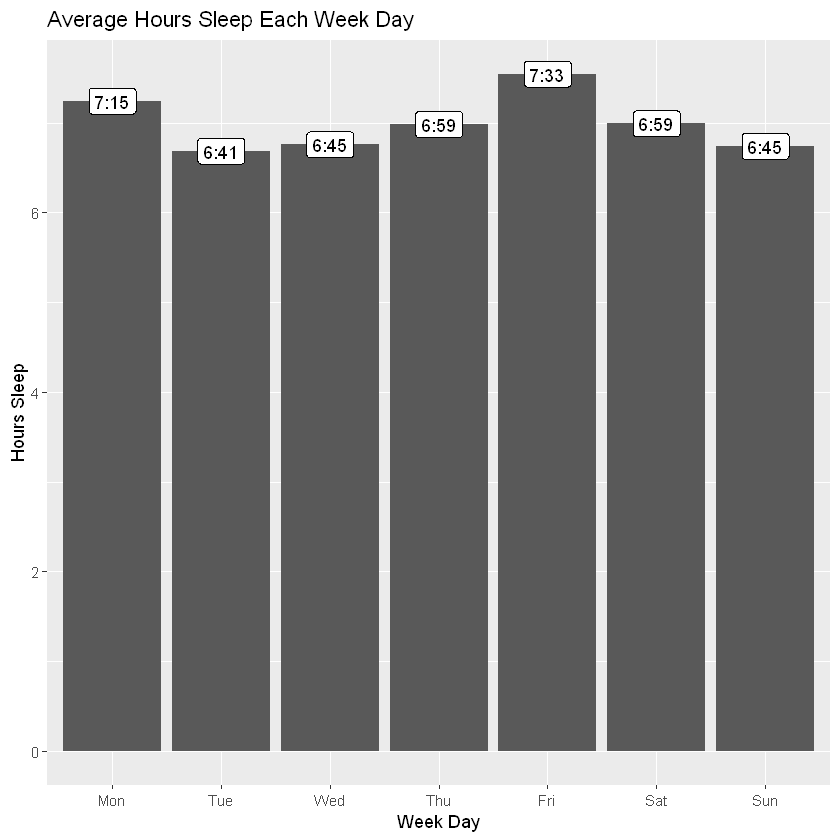

In [74]:
merged_data_daily_sleep_averages_labelled <- merged_data_daily %>%
  ## remove records where no sleep record was made (no device usage)
  filter(total_sleep_records > 0) %>%
  group_by(week_day) %>%
  summarise(
    mean_total_minutes_asleep = mean(total_minutes_asleep),
    hours = (mean_total_minutes_asleep/60),
    floorhours = floor(hours),
    sumhours = round(hours %% floorhours * 60,0 ),
    label = paste0(floorhours,":",sumhours)
  )
ggplot(data=merged_data_daily_sleep_averages_labelled, aes(x=week_day,y=hours,label = label)) + geom_col() + geom_label(position = position_dodge(width = 1)) + xlab(label = "Week Day") + ylab(label = "Hours Sleep") + ggtitle(label = "Average Hours Sleep Each Week Day")

Creating a graph of average time in bed and awake each week day:

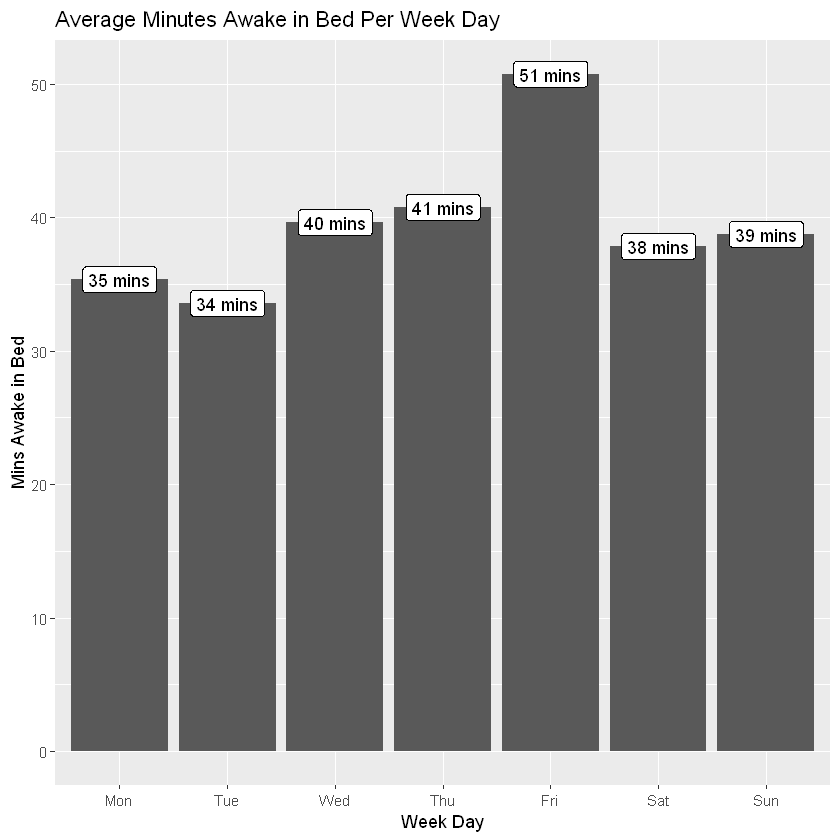

In [75]:
merged_data_daily_bed_awake_averages_labelled <- merged_data_daily %>%
  ## remove records where no sleep record was made (no device usage)
  filter(total_sleep_records > 0) %>%
  group_by(week_day) %>%
  summarise(
    mean_time_awake_in_bed = mean(time_awake_in_bed),
    label = paste0(round(mean_time_awake_in_bed)," mins")
  )
ggplot(data=merged_data_daily_bed_awake_averages_labelled, aes(x=week_day,y=mean_time_awake_in_bed,label = label)) + geom_col() + geom_label(position = position_dodge(width = 1)) + xlab(label = "Week Day") + ylab(label = "Mins Awake in Bed") + ggtitle(label = "Average Minutes Awake in Bed Per Week Day")

## Processing the Hourly Intensities Data

Determine how the data is structured.

In [76]:
str(hourlySteps_merged)

spc_tbl_ [22,099 x 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : num [1:22099] 373 160 151 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   StepTotal = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Check for NA values and duplicate rows.

In [77]:
sum(is.na(hourlySteps_merged))
sum(duplicated(hourlySteps_merged))

[1] 0

[1] 0

Clean the column names.

In [78]:
hourlySteps_merged <- clean_names(hourlySteps_merged)
str(hourlySteps_merged)

spc_tbl_ [22,099 x 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id           : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_hour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ step_total   : num [1:22099] 373 160 151 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   StepTotal = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Add columns for the date, the hour(and ways to represent it) and id/date/hour for joins later.

In [79]:
hourlySteps_merged <- hourlySteps_merged %>%
  mutate(
    new_date = as.Date(activity_hour,"%m/%d/%y"),
    new_hour = format(mdy_hms(activity_hour),format="%H:%M"),
    hour_int = hour(mdy_hms(activity_hour)),
    hour_label = format(mdy_hms(activity_hour),format="%H%p"),
    hour_label_simple = format(mdy_hms(activity_hour),format="%H"),
    week_day = wday(new_date,label=TRUE,week_start=1),
    id_and_time = paste0(id,"_and_",new_date,"_and_",new_hour)
  )
str(hourlySteps_merged)

tibble [22,099 x 10] (S3: tbl_df/tbl/data.frame)
 $ id               : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_hour    : chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ step_total       : num [1:22099] 373 160 151 0 0 ...
 $ new_date         : Date[1:22099], format: "2020-04-12" "2020-04-12" ...
 $ new_hour         : chr [1:22099] "00:00" "01:00" "02:00" "03:00" ...
 $ hour_int         : int [1:22099] 0 1 2 3 4 5 6 7 8 9 ...
 $ hour_label       : chr [1:22099] "00AM" "01AM" "02AM" "03AM" ...
 $ hour_label_simple: chr [1:22099] "00" "01" "02" "03" ...
 $ week_day         : Ord.factor w/ 7 levels "Mon"<"Tue"<"Wed"<..: 7 7 7 7 7 7 7 7 7 7 ...
 $ id_and_time      : chr [1:22099] "1503960366_and_2020-04-12_and_00:00" "1503960366_and_2020-04-12_and_01:00" "1503960366_and_2020-04-12_and_02:00" "1503960366_and_2020-04-12_and_03:00" ...


## Processing the Hourly Intensities Data

Determine how the data is structured.

In [80]:
str(hourlyIntensities_merged)

spc_tbl_ [22,099 x 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id              : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : num [1:22099] 20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num [1:22099] 0.333 0.133 0.117 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   TotalIntensity = col_double(),
  ..   AverageIntensity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Check for NA values and duplicate rows.

In [81]:
sum(is.na(hourlyIntensities_merged))
sum(duplicated(hourlyIntensities_merged))

[1] 0

[1] 0

Clean the column names.

In [82]:
hourlyIntensities_merged <- clean_names(hourlyIntensities_merged)
str(hourlyIntensities_merged)

spc_tbl_ [22,099 x 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id               : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_hour    : chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ total_intensity  : num [1:22099] 20 8 7 0 0 0 0 0 13 30 ...
 $ average_intensity: num [1:22099] 0.333 0.133 0.117 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   TotalIntensity = col_double(),
  ..   AverageIntensity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Add columns for the date, the hour and id/date/hour for joins later.

In [83]:
hourlyIntensities_merged <- hourlyIntensities_merged %>%
  mutate(
    new_date = as.Date(activity_hour,"%m/%d/%y"),
    new_hour = format(mdy_hms(activity_hour),format="%H:%M"),
    week_day = wday(new_date,label=TRUE,week_start=1),
    id_and_time = paste0(id,"_and_",new_date,"_and_",new_hour)
  )
str(hourlyIntensities_merged)

tibble [22,099 x 8] (S3: tbl_df/tbl/data.frame)
 $ id               : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_hour    : chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ total_intensity  : num [1:22099] 20 8 7 0 0 0 0 0 13 30 ...
 $ average_intensity: num [1:22099] 0.333 0.133 0.117 0 0 ...
 $ new_date         : Date[1:22099], format: "2020-04-12" "2020-04-12" ...
 $ new_hour         : chr [1:22099] "00:00" "01:00" "02:00" "03:00" ...
 $ week_day         : Ord.factor w/ 7 levels "Mon"<"Tue"<"Wed"<..: 7 7 7 7 7 7 7 7 7 7 ...
 $ id_and_time      : chr [1:22099] "1503960366_and_2020-04-12_and_00:00" "1503960366_and_2020-04-12_and_01:00" "1503960366_and_2020-04-12_and_02:00" "1503960366_and_2020-04-12_and_03:00" ...


## Processing the Hourly Calories Data

Determine how the data is structured.

In [46]:
str(hourlyCalories_merged)

spc_tbl_ [22,099 x 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Check for NA values and duplicate rows.

In [84]:
sum(is.na(hourlyCalories_merged))
sum(duplicated(hourlyCalories_merged))

[1] 0

[1] 0

Clean the column names.

In [85]:
hourlyCalories_merged <- clean_names(hourlyCalories_merged)
str(hourlyCalories_merged)

spc_tbl_ [22,099 x 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id           : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_hour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ calories     : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Add columns for the date, the hour and id/date/hour for joins later.

In [86]:
hourlyCalories_merged <- hourlyCalories_merged %>%
  mutate(
    new_date = as.Date(activity_hour,"%m/%d/%y"),
    new_hour = format(mdy_hms(activity_hour),format="%H:%M"),
    week_day = wday(new_date,label=TRUE),
    id_and_time = paste0(id,"_and_",new_date,"_and_",new_hour)
  )
str(hourlyCalories_merged)

tibble [22,099 x 7] (S3: tbl_df/tbl/data.frame)
 $ id           : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_hour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ calories     : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 $ new_date     : Date[1:22099], format: "2020-04-12" "2020-04-12" ...
 $ new_hour     : chr [1:22099] "00:00" "01:00" "02:00" "03:00" ...
 $ week_day     : Ord.factor w/ 7 levels "Sun"<"Mon"<"Tue"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id_and_time  : chr [1:22099] "1503960366_and_2020-04-12_and_00:00" "1503960366_and_2020-04-12_and_01:00" "1503960366_and_2020-04-12_and_02:00" "1503960366_and_2020-04-12_and_03:00" ...


## Creating temp tables for joining

Hourly Steps Data:

In [50]:
colnames(hourlySteps_merged)

[1] "id"                "activity_hour"     "step_total"       
 [4] "new_date"          "new_hour"          "hour_int"         
 [7] "hour_label"        "hour_label_simple" "week_day"         
[10] "id_and_time"

In [90]:
temp_hourly_steps <- select(hourlySteps_merged, 
  "id", 
  "activity_hour",
  "id_and_time",
  "new_date",
  "new_hour",
  "hour_int",
  "hour_label",
  "hour_label_simple",
  "week_day",
  "step_total"
  )

Hourly Intensities Data:

In [91]:
colnames(hourlyIntensities_merged)

[1] "id"                "activity_hour"     "total_intensity"  
[4] "average_intensity" "new_date"          "new_hour"         
[7] "week_day"          "id_and_time"

In [92]:
temp_hourly_intensities <- select(hourlyIntensities_merged, 
  "id_and_time",
  "total_intensity",
  "average_intensity"
  )

Merge these two data frames with an outer join.

In [93]:
merged_hourly_steps_and_intensities <- merge(x = temp_hourly_steps, y = temp_hourly_intensities, by = "id_and_time", all = TRUE)
str(merged_hourly_steps_and_intensities)

'data.frame':	22099 obs. of  12 variables:
 $ id_and_time      : chr  "1503960366_and_2020-04-12_and_00:00" "1503960366_and_2020-04-12_and_01:00" "1503960366_and_2020-04-12_and_02:00" "1503960366_and_2020-04-12_and_03:00" ...
 $ id               : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_hour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ new_date         : Date, format: "2020-04-12" "2020-04-12" ...
 $ new_hour         : chr  "00:00" "01:00" "02:00" "03:00" ...
 $ hour_int         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ hour_label       : chr  "00AM" "01AM" "02AM" "03AM" ...
 $ hour_label_simple: chr  "00" "01" "02" "03" ...
 $ week_day         : Ord.factor w/ 7 levels "Mon"<"Tue"<"Wed"<..: 7 7 7 7 7 7 7 7 7 7 ...
 $ step_total       : num  373 160 151 0 0 ...
 $ total_intensity  : num  20 8 7 0 0 0 0 0 13 30 ...
 $ average_intensity: num  0.333 0.133 0.117 0 0 ...


Hourly Calories Data.

In [94]:
colnames(hourlyCalories_merged)

[1] "id"            "activity_hour" "calories"      "new_date"     
[5] "new_hour"      "week_day"      "id_and_time"

In [95]:
temp_hourly_calories <- select(hourlyCalories_merged, 
  "id_and_time",
  "calories"
  )
colnames(temp_hourly_calories)

[1] "id_and_time" "calories"

Merge all data together.

In [96]:
merged_data_hourly <- merge(x = merged_hourly_steps_and_intensities, y = temp_hourly_calories, by = "id_and_time", all = TRUE)
str(merged_data_hourly)
glimpse(merged_data_hourly)

'data.frame':	22099 obs. of  13 variables:
 $ id_and_time      : chr  "1503960366_and_2020-04-12_and_00:00" "1503960366_and_2020-04-12_and_01:00" "1503960366_and_2020-04-12_and_02:00" "1503960366_and_2020-04-12_and_03:00" ...
 $ id               : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_hour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ new_date         : Date, format: "2020-04-12" "2020-04-12" ...
 $ new_hour         : chr  "00:00" "01:00" "02:00" "03:00" ...
 $ hour_int         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ hour_label       : chr  "00AM" "01AM" "02AM" "03AM" ...
 $ hour_label_simple: chr  "00" "01" "02" "03" ...
 $ week_day         : Ord.factor w/ 7 levels "Mon"<"Tue"<"Wed"<..: 7 7 7 7 7 7 7 7 7 7 ...
 $ step_total       : num  373 160 151 0 0 ...
 $ total_intensity  : num  20 8 7 0 0 0 0 0 13 30 ...
 $ average_intensity: num  0.333 0.133 0.117 0 0 ...
 $ calories         : num  81 61 59 47 48 48

## Analyzing the Hourly Data

Create a graph of average steps per hour for all days.

Rows: 24
Columns: 2
$ hour_label_simple <chr> "00", "01", "02", "03", "04", "05", "06", "07", "08"~
$ mean_step_total   <dbl> 42.188437, 23.102894, 17.110397, 6.426581, 12.699571~


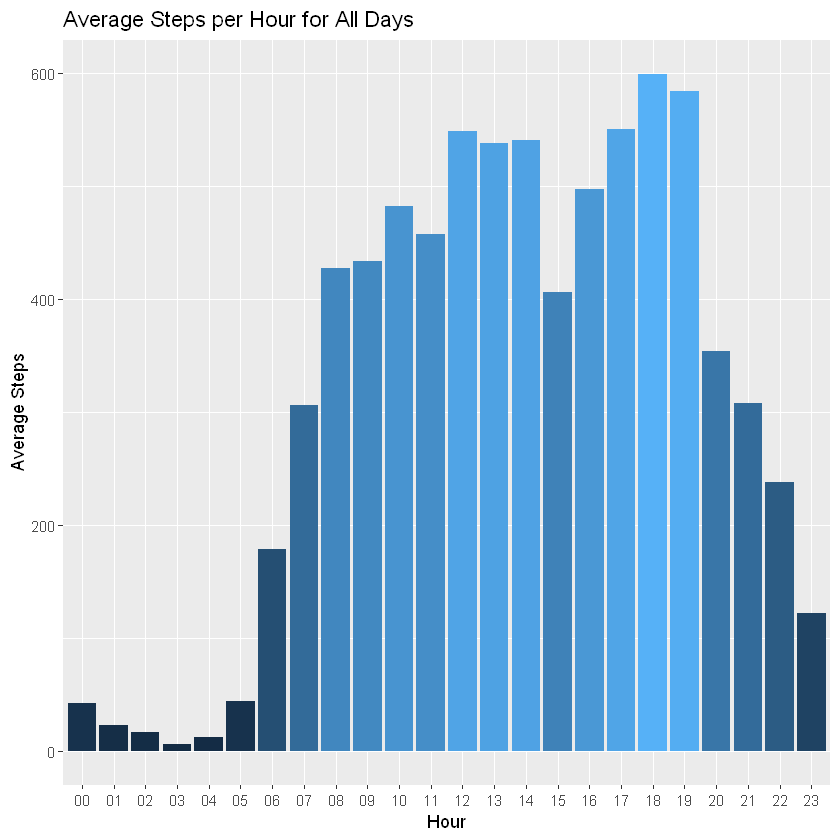

In [97]:
merged_data_hourly_averages <- merged_data_hourly %>%
  group_by(hour_label_simple) %>%
  summarise (
    mean_step_total = mean(step_total),
  ) 
glimpse(merged_data_hourly_averages)
ggplot(data=merged_data_hourly_averages, aes(x=hour_label_simple, y=mean_step_total, fill=mean_step_total)) + geom_col() + xlab(label = "Hour") + ylab(label = "Average Steps") + ggtitle(label = "Average Steps per Hour for All Days") + guides(fill="none")

Create graphs of average steps per hour for each week day.

`summarise()` has grouped output by 'week_day'. You can override using the `.groups` argument.


Rows: 168
Columns: 3
Groups: week_day [7]
$ week_day          <ord> Mon, Mon, Mon, Mon, Mon, Mon, Mon, Mon, Mon, Mon, Mo~
$ hour_label_simple <chr> "00", "01", "02", "03", "04", "05", "06", "07", "08"~
$ mean_step_total   <dbl> 31.221477, 14.906040, 14.476510, 2.228188, 14.335570~


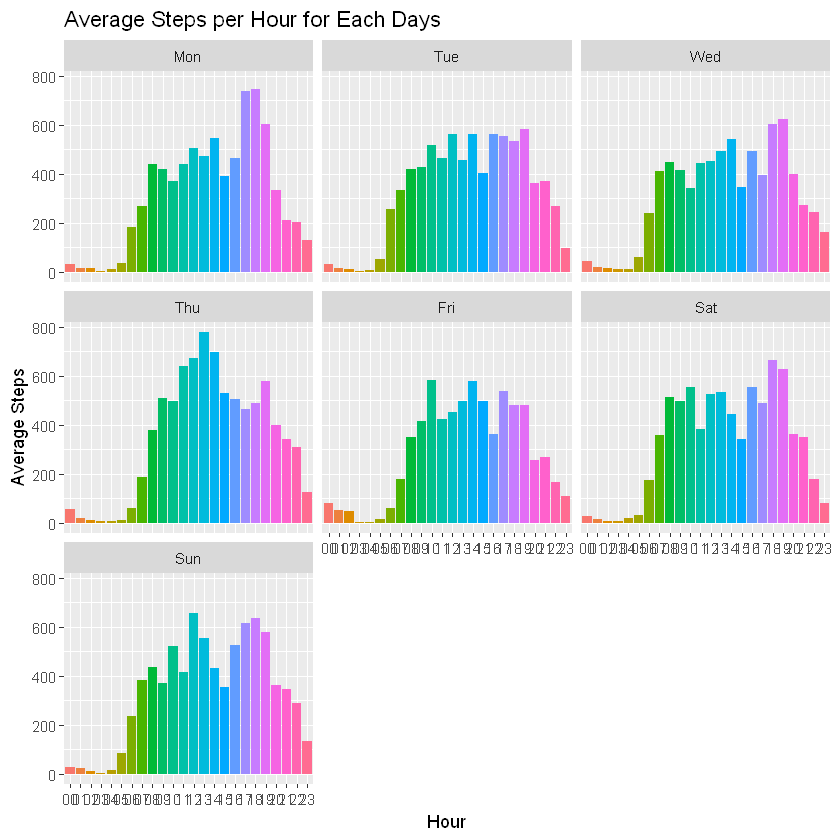

In [98]:
merged_data_hourly_averages <- merged_data_hourly %>%
  group_by(week_day, hour_label_simple) %>%
  summarise (
    mean_step_total = mean(step_total),
  ) 
glimpse(merged_data_hourly_averages)
ggplot(data=merged_data_hourly_averages, aes(x=hour_label_simple, y=mean_step_total, fill=hour_label_simple)) + geom_col() + xlab(label = "Hour") + ylab(label = "Average Steps") + ggtitle(label = "Average Steps per Hour for Each Days") + facet_wrap(~week_day) + guides(fill="none")

Create a graph of average calories burned per hour for all days.

Rows: 24
Columns: 2
$ hour_label_simple <chr> "00", "01", "02", "03", "04", "05", "06", "07", "08"~
$ mean_calories     <dbl> 71.80514, 70.16506, 69.18650, 67.53805, 68.26180, 81~


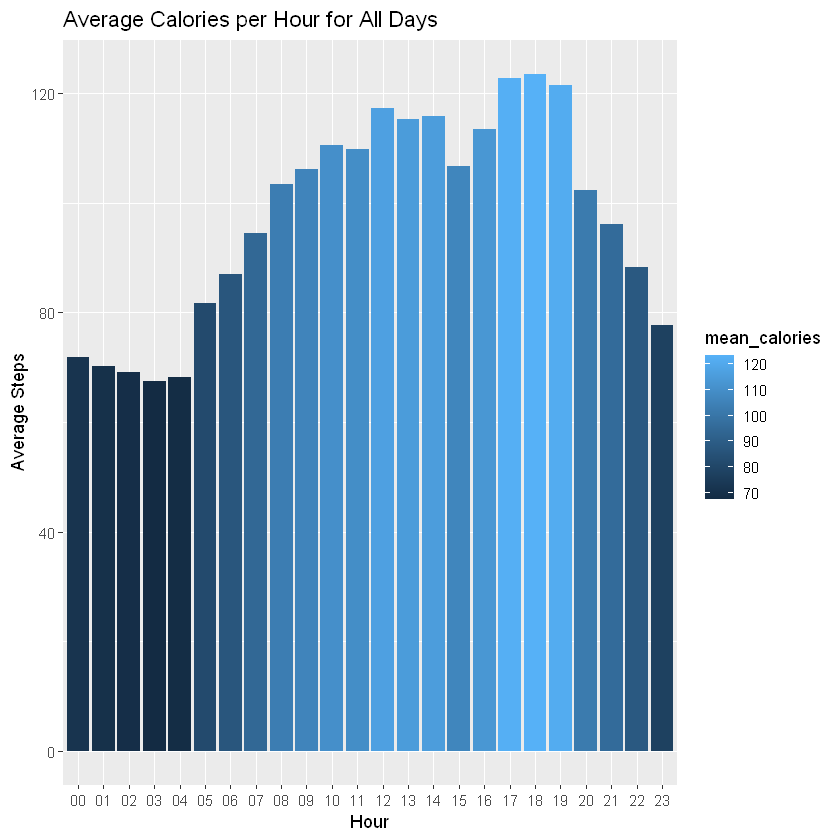

In [99]:
hourly_calories <- merged_data_hourly %>%
  group_by(hour_label_simple) %>%
  summarise (
    mean_calories = mean(calories),
  ) 

glimpse(hourly_calories)

ggplot(data=hourly_calories, aes(x=hour_label_simple, y=mean_calories,fill=mean_calories)) + geom_col() + xlab(label = "Hour") + ylab(label = "Average Steps") + ggtitle(label = "Average Calories per Hour for All Days")

Create graphs of average calories burned per hour for each week day.

`summarise()` has grouped output by 'week_day'. You can override using the `.groups` argument.


Rows: 168
Columns: 3
Groups: week_day [7]
$ week_day          <ord> Mon, Mon, Mon, Mon, Mon, Mon, Mon, Mon, Mon, Mon, Mo~
$ hour_label_simple <chr> "00", "01", "02", "03", "04", "05", "06", "07", "08"~
$ mean_calories     <dbl> 70.75168, 69.25503, 68.93960, 67.21477, 68.78523, 83~


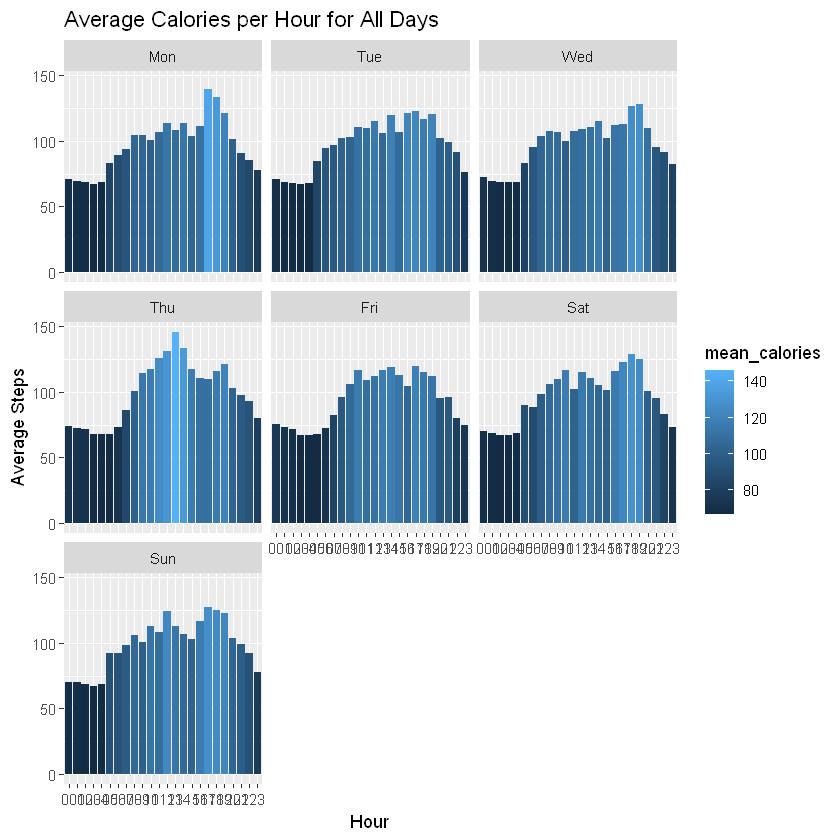

In [100]:
hourly_calories <- merged_data_hourly %>%
  group_by(week_day, hour_label_simple) %>%
  summarise (
    mean_calories = mean(calories),
  ) 

glimpse(hourly_calories)

ggplot(data=hourly_calories, aes(x=hour_label_simple, y=mean_calories,fill=mean_calories)) + geom_col() + facet_wrap(~week_day) + xlab(label = "Hour") + ylab(label = "Average Steps") + ggtitle(label = "Average Calories per Hour for All Days")

Create a graph of average intensity per hour vs. calories burned per hour.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


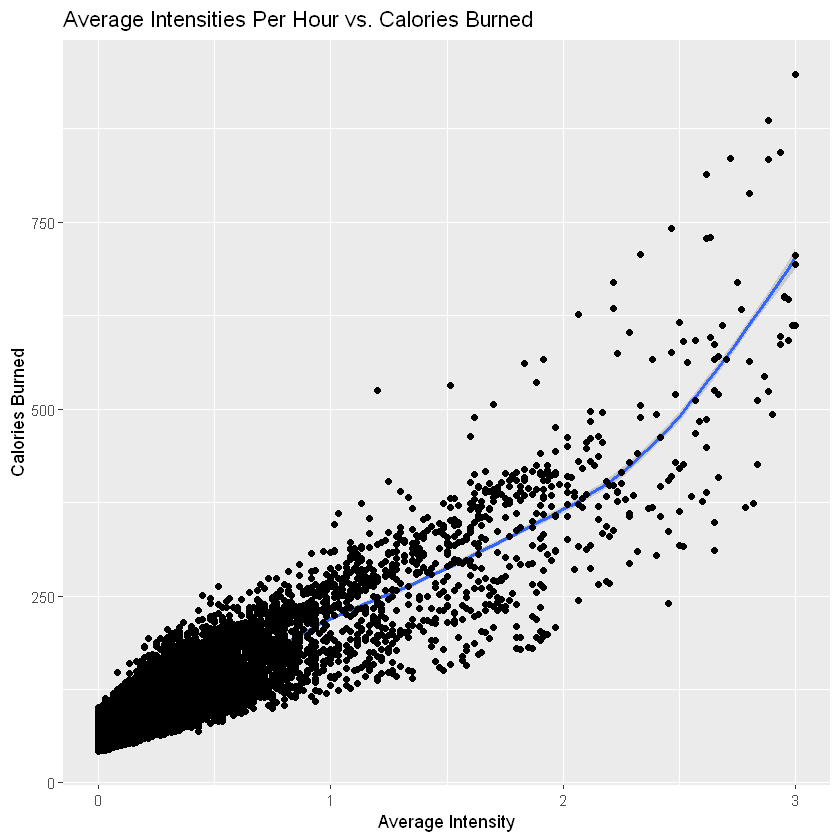

In [101]:
average_vs_cal <- merged_data_hourly %>%
  summarise (
    average_intensity = average_intensity,
      calories = calories
  ) 

ggplot(data=average_vs_cal, aes(x=average_intensity, y=calories)) + geom_smooth(aes(x=average_intensity, y=calories)) + geom_point() + xlab(label = "Average Intensity") + ylab(label = "Calories Burned") + ggtitle(label = "Average Intensities Per Hour vs. Calories Burned")